In [1]:
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor
def read_sheet(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')


file_path = r"C:\Users\athar\Desktop\Pizza.xlsx"
sheet_names = ['TotalSalesData', 'IndividualSales', 'IngedientsData', 'InventoryData', 'ProcurmentData', 'BuildOfMaterial']

# Creating empty dictionaries to store DataFrames
pizza_df= {sheet_name: pd.DataFrame() for sheet_name in sheet_names}

# Reading all sheets in parallel using a ThreadPoolExecutor
with ThreadPoolExecutor() as executor:
    results = executor.map(read_sheet, [file_path]*len(sheet_names), sheet_names)

# Assigning DataFrames to their corresponding variables
for i, df in enumerate(results):
    pizza_df[sheet_names[i]] = df




# Total Sales Data

In [2]:
pizza_df['TotalSalesData'].head(5)

,Date,Sales Quantity,Is it a Weekend,Is Campaign Active,Is National Holiday,Weekend Code,Campaign Code,National Holiday,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2021-01-01 00:00:00,386824.353170,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02 00:00:00,397952.828751,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03 00:00:00,352096.761119,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04 00:00:00,365096.799859,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-05 00:00:00,302734.873571,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pizza_df['TotalSalesData']= pizza_df['TotalSalesData'].drop(columns=['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'])

In [4]:
pizza_df['TotalSalesData'].isnull().sum()
totalsales_df=pizza_df['TotalSalesData']
totalsales_df.head()

,Date,Sales Quantity,Is it a Weekend,Is Campaign Active,Is National Holiday,Weekend Code,Campaign Code,National Holiday
0,2021-01-01 00:00:00,386824.353170,0.0,0.0,1.0,0.0,0.0,1.0
1,2021-01-02 00:00:00,397952.828751,1.0,0.0,0.0,1.0,0.0,0.0
2,2021-01-03 00:00:00,352096.761119,1.0,0.0,0.0,1.0,0.0,0.0
3,2021-01-04 00:00:00,365096.799859,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-05 00:00:00,302734.873571,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
totalsales_df.columns = totalsales_df.columns.str.replace(' ', '_')
totalsales_df.columns 

Index(['Date', 'Sales_Quantity', 'Is_it_a_Weekend', 'Is_Campaign_Active',
       'Is_National_Holiday', 'Weekend_Code', 'Campaign_Code',
       'National_Holiday'],
      dtype='object')

In [6]:
totalsales_df['Is_it_a_Weekend'] = totalsales_df['Is_it_a_Weekend'].replace({True: 1, False: 0})
totalsales_df['Is_it_a_Weekend'].equals(totalsales_df['Weekend_Code']) 
# We can see that these 2 columns are identical in nature so lets drop 1 column to reduce data size
totalsales_df=totalsales_df.drop(['Weekend_Code'],axis=1)
totalsales_df.head()

,Date,Sales_Quantity,Is_it_a_Weekend,Is_Campaign_Active,Is_National_Holiday,Campaign_Code,National_Holiday
0,2021-01-01 00:00:00,386824.353170,0.0,0.0,1.0,0.0,1.0
1,2021-01-02 00:00:00,397952.828751,1.0,0.0,0.0,0.0,0.0
2,2021-01-03 00:00:00,352096.761119,1.0,0.0,0.0,0.0,0.0
3,2021-01-04 00:00:00,365096.799859,0.0,0.0,0.0,0.0,0.0
4,2021-01-05 00:00:00,302734.873571,0.0,0.0,0.0,0.0,0.0


In [7]:
# similarly we will check for campaign and national holiday

In [8]:
totalsales_df['Is_Campaign_Active'] = totalsales_df['Is_Campaign_Active'].replace({True: 1, False: 0})
totalsales_df['Is_Campaign_Active'].equals(totalsales_df['Campaign_Code'])
# True
totalsales_df=totalsales_df.drop(['Campaign_Code'],axis=1)
totalsales_df.head()

,Date,Sales_Quantity,Is_it_a_Weekend,Is_Campaign_Active,Is_National_Holiday,National_Holiday
0,2021-01-01 00:00:00,386824.353170,0.0,0.0,1.0,1.0
1,2021-01-02 00:00:00,397952.828751,1.0,0.0,0.0,0.0
2,2021-01-03 00:00:00,352096.761119,1.0,0.0,0.0,0.0
3,2021-01-04 00:00:00,365096.799859,0.0,0.0,0.0,0.0
4,2021-01-05 00:00:00,302734.873571,0.0,0.0,0.0,0.0


In [9]:
totalsales_df['Is_National_Holiday'] = totalsales_df['Is_National_Holiday'].replace({True: 1, False: 0})
totalsales_df['Is_National_Holiday'].equals(totalsales_df['National_Holiday'])
#True
totalsales_df=totalsales_df.drop(['National_Holiday'],axis=1)
totalsales_df.head()

,Date,Sales_Quantity,Is_it_a_Weekend,Is_Campaign_Active,Is_National_Holiday
0,2021-01-01 00:00:00,386824.353170,0.0,0.0,1.0
1,2021-01-02 00:00:00,397952.828751,1.0,0.0,0.0
2,2021-01-03 00:00:00,352096.761119,1.0,0.0,0.0
3,2021-01-04 00:00:00,365096.799859,0.0,0.0,0.0
4,2021-01-05 00:00:00,302734.873571,0.0,0.0,0.0


In [10]:
totalsales_df.tail(15)
totalsales_df = totalsales_df.drop(totalsales_df.index[607:621])




Lets perform basic sales forecasting on this data we have now


In [11]:
totalsales_df['Date'] = pd.to_datetime(totalsales_df['Date'])
totalsales_df['Day_of_Week'] = totalsales_df['Date'].dt.dayofweek
totalsales_df.head()

,Date,Sales_Quantity,Is_it_a_Weekend,Is_Campaign_Active,Is_National_Holiday,Day_of_Week
0,2021-01-01,386824.353170,0.0,0.0,1.0,4
1,2021-01-02,397952.828751,1.0,0.0,0.0,5
2,2021-01-03,352096.761119,1.0,0.0,0.0,6
3,2021-01-04,365096.799859,0.0,0.0,0.0,0
4,2021-01-05,302734.873571,0.0,0.0,0.0,1


In [12]:
X = totalsales_df[['Day_of_Week', 'Is_it_a_Weekend', 'Is_Campaign_Active', 'Is_National_Holiday']]
y = totalsales_df['Sales_Quantity']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculating VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


               Feature       VIF
0          Day_of_Week  3.199959
1      Is_it_a_Weekend  3.023222
2   Is_Campaign_Active  1.084949
3  Is_National_Holiday  1.023056


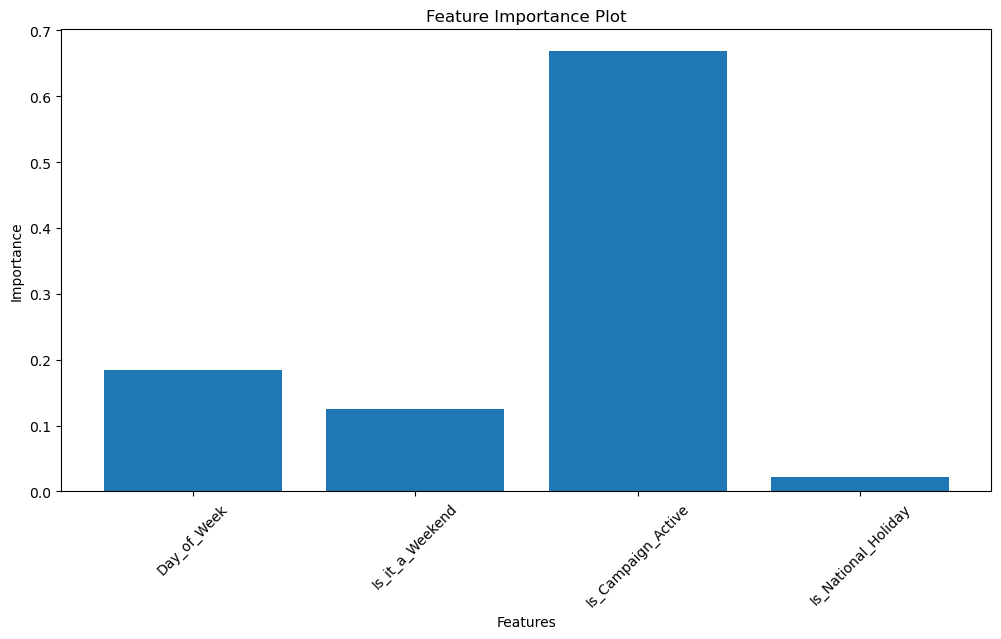

In [14]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming X_train_scaled and y_train are your scaled training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=45)
plt.show()

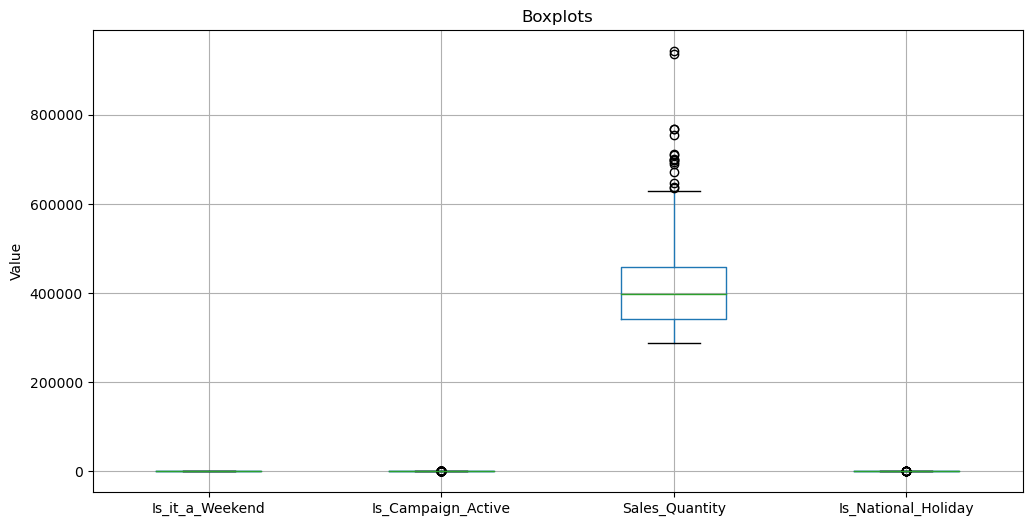

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
totalsales_df.boxplot(column=['Is_it_a_Weekend', 'Is_Campaign_Active', 'Sales_Quantity','Is_National_Holiday'])
plt.ylabel('Value')
plt.title('Boxplots')
plt.show()

In [16]:
totalsales_df

,Date,Sales_Quantity,Is_it_a_Weekend,Is_Campaign_Active,Is_National_Holiday,Day_of_Week
0,2021-01-01,386824.353170,0.0,0.0,1.0,4
1,2021-01-02,397952.828751,1.0,0.0,0.0,5
2,2021-01-03,352096.761119,1.0,0.0,0.0,6
3,2021-01-04,365096.799859,0.0,0.0,0.0,0
4,2021-01-05,302734.873571,0.0,0.0,0.0,1
...,...,...,...,...,...,...
602,2022-08-26,482971.899465,0.0,0.0,0.0,4
603,2022-08-27,546422.838520,1.0,0.0,0.0,5
604,2022-08-28,563303.081219,1.0,0.0,0.0,6
605,2022-08-29,464301.784631,0.0,0.0,0.0,0


In [17]:
# we will use iqr to treat outliers
# 1.Sales Quantity
import seaborn as sns
totalsales_df1=totalsales_df.copy()
Q1 = np.percentile(totalsales_df1['Sales_Quantity'], 25, method='midpoint')
Q3 = np.percentile(totalsales_df1['Sales_Quantity'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
print("Upper Bound:-", upper)
print("Lower Bound:-", lower)
outliers_upper = totalsales_df1['Sales_Quantity'] >= upper
outliers_lower = totalsales_df1['Sales_Quantity'] <= lower
num_outliers_upper = outliers_upper.sum()
num_outliers_lower = outliers_lower.sum()
print("Number of outliers above upper bound:", num_outliers_upper)
print("Number of outliers below lower bound:", num_outliers_lower)
totalsales_df2 = totalsales_df1[~(outliers_upper | outliers_lower)]
print(len(totalsales_df1))
print(len(totalsales_df2))
# Filter out the outlier
totalsales_df = totalsales_df2[totalsales_df2['Sales_Quantity'] <= 625607.1860791605]
print("Number of rows before removing outlier:", len(totalsales_df2))
print("Number of rows after removing outlier:", len(totalsales_df))


117109.89141664875
Upper Bound:- 633752.3222164046
Lower Bound:- 165312.75654980965
Number of outliers above upper bound: 16
Number of outliers below lower bound: 0
607
591
Number of rows before removing outlier: 591
Number of rows after removing outlier: 590


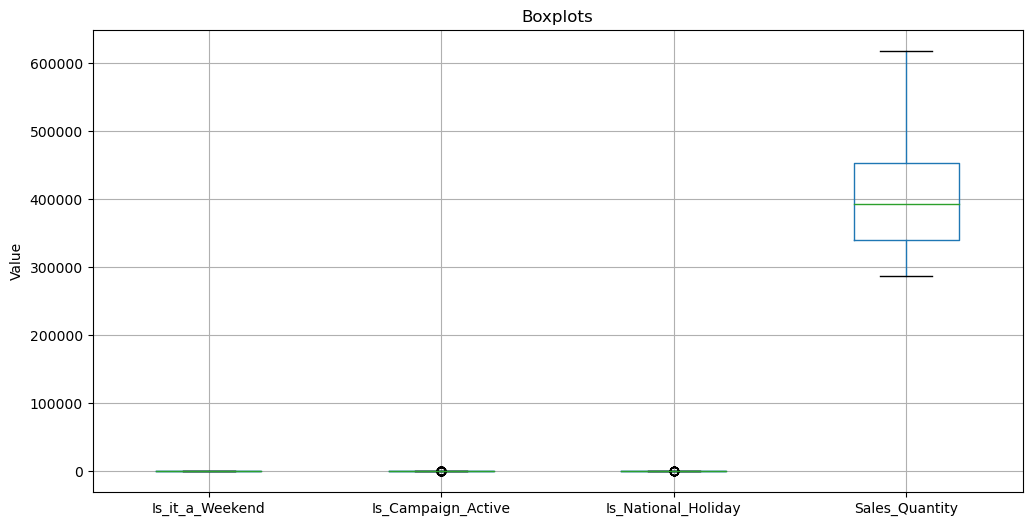

In [18]:
plt.figure(figsize=(12, 6))
totalsales_df.boxplot(column=['Is_it_a_Weekend', 'Is_Campaign_Active', 'Is_National_Holiday','Sales_Quantity'])
plt.ylabel('Value')
plt.title('Boxplots')
plt.show()

In [19]:
totalsales_df34= totalsales_df.copy()
totalsales_df34.set_index('Date', inplace=True)
totalsales_df34
# 591 rows × 5 columns

,Sales_Quantity,Is_it_a_Weekend,Is_Campaign_Active,Is_National_Holiday,Day_of_Week
Date,,,,,
2021-01-01,386824.353170,0.0,0.0,1.0,4
2021-01-02,397952.828751,1.0,0.0,0.0,5
2021-01-03,352096.761119,1.0,0.0,0.0,6
2021-01-04,365096.799859,0.0,0.0,0.0,0
2021-01-05,302734.873571,0.0,0.0,0.0,1
...,...,...,...,...,...
2022-08-26,482971.899465,0.0,0.0,0.0,4
2022-08-27,546422.838520,1.0,0.0,0.0,5
2022-08-28,563303.081219,1.0,0.0,0.0,6


<Axes: xlabel='Date'>

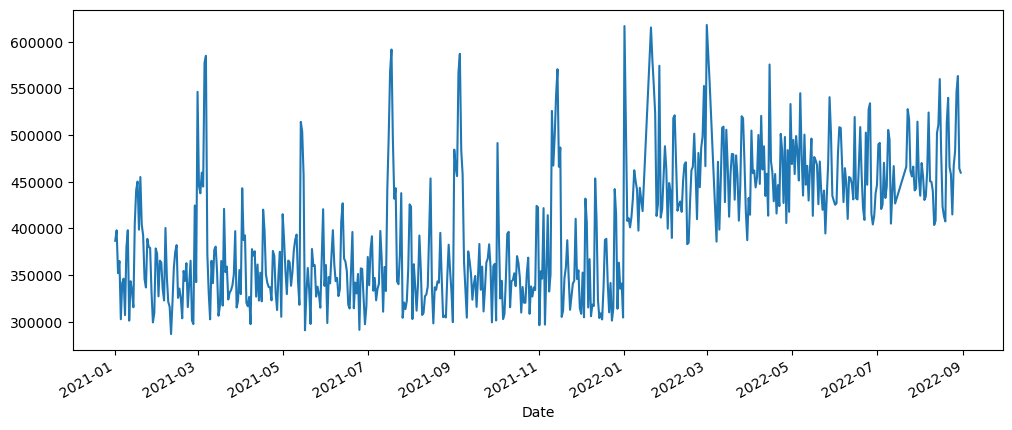

In [20]:
totalsales_df34['Sales_Quantity'].plot(figsize=(12,5))

In [21]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [22]:
print(totalsales_df34.shape)
train=totalsales_df34.iloc[:-30]
test=totalsales_df34.iloc[-30:]
print(train.shape,test.shape)

(590, 5)
(560, 5) (30, 5)


# ARIMA

We will be now forecasting using ARIMA

In [23]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

endog = totalsales_df34['Sales_Quantity']
exog = totalsales_df34[['Is_it_a_Weekend', 'Is_Campaign_Active', 'Is_National_Holiday', 'Day_of_Week']]

# Grid Search for Hyperparameter Tuning
best_rmse = float('inf')
best_order = None
for p in range(1, 5):
    for d in range(1, 3):
        for q in range(1, 5):
            try:
                model = ARIMA(endog, exog=exog, order=(p, d, q))
                result = model.fit()
                forecast = result.predict(start=len(endog), end=len(endog)+30, exog=exog.iloc[-31:])
                mse = mean_squared_error(totalsales_df34['Sales_Quantity'][-31:], forecast)
                rmse = np.sqrt(mse)
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = (p, d, q)
            except:
                continue
print("Best Order:", best_order)


Best Order: (4, 1, 3)


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

endog = totalsales_df34['Sales_Quantity']
exog = totalsales_df34[['Is_it_a_Weekend', 'Is_Campaign_Active', 'Is_National_Holiday', 'Day_of_Week']]
# Fitting the ARIMA model
model = ARIMA(endog, exog=exog, order=(4, 1, 3))
result = model.fit()
# p=4: The number of lag observations included in the model 
# d=1: The number of times that the raw observations are differenced 
# q=3: The size of the moving average window.
# Forecasting the next 30 days
forecast = result.get_forecast(steps=30, exog=exog.iloc[-30:])
forecast_index = pd.date_range(start=totalsales_df34.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()
# Calculating RMSE
mse = mean_squared_error(totalsales_df34['Sales_Quantity'][-30:], forecast_values)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
# 28724.291280961654




Root Mean Squared Error (RMSE): 28724.291280961654


In [44]:
# Creating the forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Sales': forecast_values
}).set_index('Date')

print(forecast_df)

            Forecasted Sales
Date                        
2022-08-31     463391.645446
2022-09-01     459054.504627
2022-09-02     463263.945347
2022-09-03     456710.172971
2022-09-04     458406.793864
2022-09-05     518244.083226
2022-09-06     513042.551666
2022-09-07     465835.052295
2022-09-08     460031.635893
2022-09-09     460303.256852
2022-09-10     460952.081233
2022-09-11     455017.164186
2022-09-12     519402.044997
2022-09-13     514652.139410
2022-09-14     560950.125505
2022-09-15     464015.628897
2022-09-16     457720.090379
2022-09-17     461005.683634
2022-09-18     457486.673243
2022-09-19     515538.335696
2022-09-20     518176.026117
2022-09-21     460607.654370
2022-09-22     463038.633324
2022-09-23     460830.072460
2022-09-24     457171.062580
2022-09-25     460332.911641
2022-09-26     514933.173376
2022-09-27     516298.779646
2022-09-28     464102.491986
2022-09-29     459499.227247


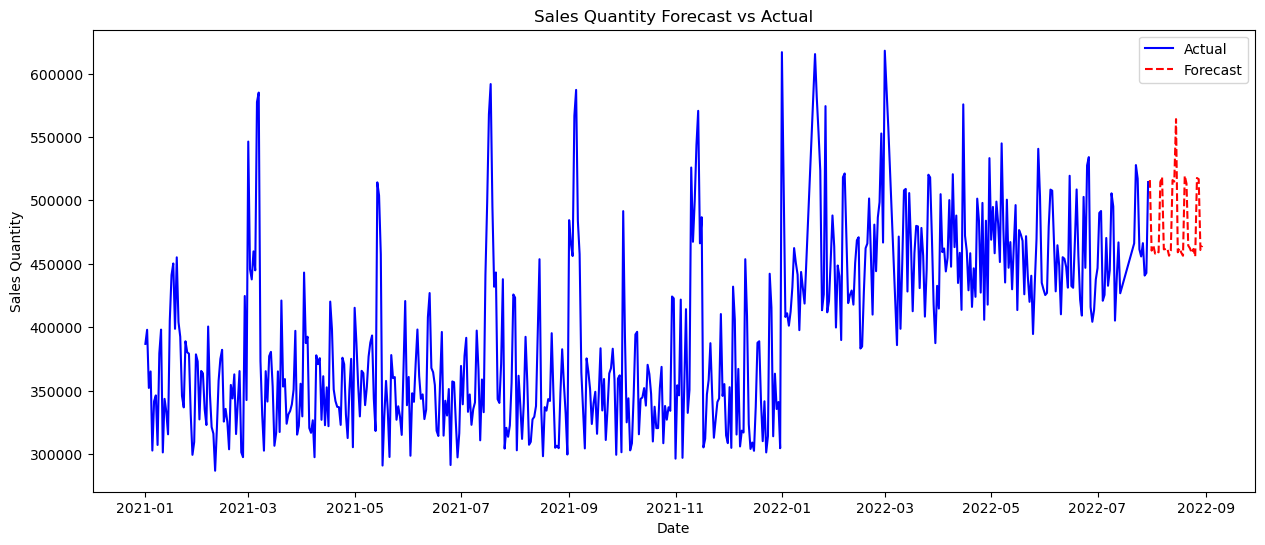

In [25]:
# Forecasting plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(totalsales_df34.index[:-31], totalsales_df34['Sales_Quantity'][:-31], label='Actual', color='blue')
plt.plot(totalsales_df34.index[-31:], forecast, label='Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity Forecast vs Actual')
plt.legend()
plt.show()


# Individual Sales Data

In [26]:
pizza_df['IndividualSales'].isnull().sum()


Date                                   0
Margherita Sales Quantity              0
Farmhouse Sales Quantity               0
Peppy Paneer Sales Quantity            0
Veggie Paradise Sales Quantity         0
Deluxe Veggie Sales Quantity           0
Veg Extravaganza Sales Quantity        0
Cheese Burst Sales Quantity            0
Pepperoni Sales Quantity               0
Chicken Dominator Sales Quantity       0
Non-Veg Supreme Sales Quantity         0
Chicken Tikka Sales Quantity           0
Mexican Green Wave Sales Quantity      0
Non-Veg Extravaganza Sales Quantity    0
dtype: int64

In [27]:
indsales_df=pizza_df['IndividualSales']
indsales_df.columns = indsales_df.columns.str.replace(' ', '_')
indsales_df.columns

Index(['Date', 'Margherita_Sales_Quantity', 'Farmhouse_Sales_Quantity',
       'Peppy_Paneer_Sales_Quantity', 'Veggie_Paradise_Sales_Quantity',
       'Deluxe_Veggie_Sales_Quantity', 'Veg_Extravaganza_Sales_Quantity',
       'Cheese_Burst_Sales_Quantity', 'Pepperoni_Sales_Quantity',
       'Chicken_Dominator_Sales_Quantity', 'Non-Veg_Supreme_Sales_Quantity',
       'Chicken_Tikka_Sales_Quantity', 'Mexican_Green_Wave_Sales_Quantity',
       'Non-Veg_Extravaganza_Sales_Quantity'],
      dtype='object')

In [46]:
indsales_df.sample(10)

,Margherita_Sales_Quantity,Farmhouse_Sales_Quantity,Peppy_Paneer_Sales_Quantity,Veggie_Paradise_Sales_Quantity,Deluxe_Veggie_Sales_Quantity,Veg_Extravaganza_Sales_Quantity,Cheese_Burst_Sales_Quantity,Pepperoni_Sales_Quantity,Chicken_Dominator_Sales_Quantity,Non-Veg_Supreme_Sales_Quantity,Chicken_Tikka_Sales_Quantity,Mexican_Green_Wave_Sales_Quantity,Non-Veg_Extravaganza_Sales_Quantity
Date,,,,,,,,,,,,,
2022-01-10,48723.489506,36076.783948,43465.660669,28478.107158,38080.268269,28108.156612,28405.840308,37841.396765,25515.340073,26113.670459,48725.569599,29086.254056,22816.082520
2021-08-07,36175.902383,32000.588848,34468.514867,32226.129919,31037.447979,25391.308690,25476.583958,29454.340087,26784.101555,32348.713008,35060.493184,27026.274637,24959.227118
2021-03-09,35169.768482,24704.340458,25943.199739,23521.081582,24044.764259,22455.410249,23114.460716,24097.474672,23833.255283,29650.164822,36123.814083,21928.783542,16140.783107
2021-11-03,37312.296253,30831.724749,25750.427358,21823.320223,22031.144412,19988.467962,23107.286161,29603.586073,23159.926669,25741.758738,37590.509829,25711.427521,23605.035410
2021-11-14,53422.397609,55391.929906,46807.017393,47641.320940,34028.323622,32200.864919,36035.013543,36626.703897,46137.800151,46839.629765,64899.087288,41018.708694,29541.140236
2021-04-30,29605.266306,24562.663080,27343.532069,23506.722218,17676.808883,19174.984749,17323.575683,25044.501484,26480.036009,18994.228396,36330.796670,21359.714616,17951.068871
2022-07-20,80354.535323,58948.169450,68599.606223,51082.806552,49838.377772,51316.086626,43720.992497,47129.969589,55507.797068,65754.895202,89231.829267,49914.520470,43416.786615
2021-08-28,38292.949441,30551.770456,35842.058001,34829.116584,28495.518607,23918.491288,22858.824053,26092.041119,21174.793267,33038.019565,40120.186567,26434.958193,20938.112785
2021-02-07,40999.418474,31018.161274,26638.140739,26764.974598,20348.845316,19681.152765,23073.938523,31178.640702,20714.632994,26273.307151,40455.489613,19888.742108,20615.801149


In [28]:
indsales_df.tail()

,Date,Margherita_Sales_Quantity,Farmhouse_Sales_Quantity,Peppy_Paneer_Sales_Quantity,Veggie_Paradise_Sales_Quantity,Deluxe_Veggie_Sales_Quantity,Veg_Extravaganza_Sales_Quantity,Cheese_Burst_Sales_Quantity,Pepperoni_Sales_Quantity,Chicken_Dominator_Sales_Quantity,Non-Veg_Supreme_Sales_Quantity,Chicken_Tikka_Sales_Quantity,Mexican_Green_Wave_Sales_Quantity,Non-Veg_Extravaganza_Sales_Quantity
604,2022-08-28 00:00:00,6.312702e+04,4.056857e+04,4.696765e+04,3.719454e+04,4.876408e+04,3.766476e+04,3.092642e+04,4.589625e+04,3.622593e+04,4.666240e+04,6.307378e+04,3.237898e+04,3.385270e+04
605,2022-08-29 00:00:00,4.245739e+04,3.413830e+04,3.817749e+04,3.856482e+04,3.154010e+04,2.507488e+04,2.806741e+04,3.554639e+04,3.803530e+04,4.037429e+04,5.213387e+04,2.996908e+04,3.022246e+04
606,2022-08-30 00:00:00,4.498163e+04,3.601419e+04,3.525394e+04,3.787562e+04,3.521166e+04,3.045923e+04,3.230005e+04,3.803830e+04,2.807869e+04,3.634723e+04,5.289151e+04,3.057089e+04,2.179152e+04
607,2022-08-31 00:00:00,4.758798e+04,3.294523e+04,3.806665e+04,3.395040e+04,2.930794e+04,2.305143e+04,2.660101e+04,2.394525e+04,2.938328e+04,3.466699e+04,3.966562e+04,2.457051e+04,2.535516e+04
608,TOTAL,2.583132e+07,2.129665e+07,2.138376e+07,1.911279e+07,1.799544e+07,1.573472e+07,1.582199e+07,1.819897e+07,1.801734e+07,1.801242e+07,2.595638e+07,1.700878e+07,1.467430e+07


In [29]:
indsales_df.drop(608, inplace=True)
indsales_df.tail()


,Date,Margherita_Sales_Quantity,Farmhouse_Sales_Quantity,Peppy_Paneer_Sales_Quantity,Veggie_Paradise_Sales_Quantity,Deluxe_Veggie_Sales_Quantity,Veg_Extravaganza_Sales_Quantity,Cheese_Burst_Sales_Quantity,Pepperoni_Sales_Quantity,Chicken_Dominator_Sales_Quantity,Non-Veg_Supreme_Sales_Quantity,Chicken_Tikka_Sales_Quantity,Mexican_Green_Wave_Sales_Quantity,Non-Veg_Extravaganza_Sales_Quantity
603,2022-08-27 00:00:00,61456.416766,52816.944675,43273.206858,39201.867333,44039.982057,31132.601910,32466.957233,35670.193943,33779.368808,43995.448187,62433.896456,40361.318419,25794.635876
604,2022-08-28 00:00:00,63127.024559,40568.567480,46967.653445,37194.538854,48764.078531,37664.756257,30926.422945,45896.249138,36225.931708,46662.401381,63073.780760,32378.975081,33852.701080
605,2022-08-29 00:00:00,42457.394396,34138.296427,38177.491605,38564.816887,31540.095038,25074.884855,28067.414575,35546.389729,38035.303408,40374.290007,52133.867545,29969.082808,30222.457351
606,2022-08-30 00:00:00,44981.634910,36014.189810,35253.944354,37875.619500,35211.658637,30459.225184,32300.050401,38038.296272,28078.694844,36347.234386,52891.508285,30570.894436,21791.520662
607,2022-08-31 00:00:00,47587.984999,32945.230748,38066.652014,33950.400043,29307.937936,23051.433273,26601.013668,23945.252253,29383.278334,34666.990198,39665.615594,24570.509799,25355.160414


In [30]:
# setting date as index 
indsales_df['Date'] = pd.to_datetime(indsales_df['Date'])
indsales_df.set_index('Date', inplace=True)

In [31]:
# creating a varible for each individual pizza type 
for column in indsales_df.columns:
    if column != 'Date':
        grouped_df = indsales_df[[column]]
        col_name_without_spaces = column.replace(' ', '_')
        var_name_parts = col_name_without_spaces.split('_')
        var_name_parts = var_name_parts[:-2] 
        var_name = '_'.join(var_name_parts)
        globals()[var_name] = grouped_df
        print("Variable name:", var_name)


Variable name: Margherita
Variable name: Farmhouse
Variable name: Peppy_Paneer
Variable name: Veggie_Paradise
Variable name: Deluxe_Veggie
Variable name: Veg_Extravaganza
Variable name: Cheese_Burst
Variable name: Pepperoni
Variable name: Chicken_Dominator
Variable name: Non-Veg_Supreme
Variable name: Chicken_Tikka
Variable name: Mexican_Green_Wave
Variable name: Non-Veg_Extravaganza


In [32]:
variables = ['Margherita', 'Farmhouse', 'Peppy_Paneer', 'Veggie_Paradise', 'Deluxe_Veggie', 
             'Veg_Extravaganza', 'Cheese_Burst', 'Pepperoni', 'Chicken_Dominator', 
             'Non-Veg_Supreme', 'Chicken_Tikka', 'Mexican_Green_Wave', 'Non-Veg_Extravaganza']
from statsmodels.tsa.statespace.sarimax import SARIMAX
for var_name in variables:
    var_df = globals()[var_name]
    print('- - - - - - - ' * 9)
    print('- - - - - - - ' * 9)
    print(f"Working on {var_name}")
    sales_col = f"{var_name}_Sales_Quantity"
    
    sarima_model = SARIMAX(var_df[sales_col], order=(2, 1, 3), seasonal_order=(1, 0, 0, 12))
    sarima_result = sarima_model.fit()
    # print(sarima_result.summary())

    pred_in_sample = sarima_result.get_prediction(start=var_df.index[0], end=var_df.index[-1])
    pred_mean = pred_in_sample.predicted_mean
    pred_ci = pred_in_sample.conf_int()
    mse = mean_squared_error(var_df[sales_col], pred_mean)
    rmse = np.sqrt(mse)
    print('RMSE :-', rmse)
    
    # Forecasting the next 30 days
    forecast = sarima_result.get_forecast(steps=30)
    forecast_index = pd.date_range(start=var_df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()
    forecast_df = pd.DataFrame({
        'Date': forecast_index,
        'Forecast': forecast_values
    })
    print(forecast_df)
    # hyperparameter tuning using grid search can be used to increase accuracy 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Working on Margherita
RMSE :- 7082.117466077056
                 Date      Forecast
2022-09-01 2022-09-01  47635.699835
2022-09-02 2022-09-02  48605.162236
2022-09-03 2022-09-03  49443.399657
2022-09-04 2022-09-04  49960.116107
2022-09-05 2022-09-05  50741.393510
2022-09-06 2022-09-06  50570.927190
2022-09-07 2022-09-07  50726.036786
2022-09-08 2022-09-08  49438.709967
2022-09-09 2022-09-09  49332.477370
2022-09-10 2022-09-10  51411.381192
2022-09-11 2022-09-11  51191.493682
2022-09-12 2022-09-12  50955.802634
2022-09-13 2022-09-13  50965.181727
2022-09-14 2022-09-14  50879.864416
2022-09-15 2022-09-15  50804.210181
2022-09-16 2022-09-16  50758.248438
2022-09-17 2022-09-17  50684.680193
2022-09-18 2022-09-18  50703.857053
2022-09-19 202

import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Create a new Excel workbook
wb = Workbook()
wb.remove(wb.active)  # Remove the default sheet

# List of variable names
variables = ['Margherita', 'Farmhouse', 'Peppy_Paneer', 'Veggie_Paradise', 'Deluxe_Veggie', 
             'Veg_Extravaganza', 'Cheese_Burst', 'Pepperoni', 'Chicken_Dominator', 
             'Non-Veg_Supreme', 'Chicken_Tikka', 'Mexican_Green_Wave', 'Non-Veg_Extravaganza']

for var_name in variables:
    var_df = globals()[var_name]
    print('- - - - - - - '*9)
    print('- - - - - - - '*9)
    print(f"Working on {var_name}")
    sales_col = f"{var_name}_Sales_Quantity"
    sarima_model = SARIMAX(var_df[sales_col], order=(2, 1, 3), seasonal_order=(1, 0, 0, 12))
    sarima_result = sarima_model.fit()
    #print(sarima_result.summary())
    

    pred_in_sample = sarima_result.get_prediction(start=var_df.index[0], end=var_df.index[-1])
    pred_mean = pred_in_sample.predicted_mean
    pred_ci = pred_in_sample.conf_int()
    mse = mean_squared_error(var_df[sales_col], pred_mean)
    rmse = np.sqrt(mse)
    print('RMSE :-', rmse)
    # Forecasting the next 30 days
    forecast = sarima_result.get_forecast(steps=30)
    forecast_index = pd.date_range(start=var_df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()
    forecast_df = pd.DataFrame({
        'Date': forecast_index,
        'Forecast': forecast_values
    })
    print(forecast_df)
    # Save forecast to Excel workbook
    ws = wb.create_sheet(title=var_name)
    for r in dataframe_to_rows(forecast_df, index=False, header=True):
        ws.append(r)

# Save the workbook
wb.save('Pizza_Sales_Forecasts.xlsx')


import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# List of variable names
variables = ['Margherita', 'Farmhouse', 'Peppy_Paneer', 'Veggie_Paradise', 'Deluxe_Veggie', 
             'Veg_Extravaganza', 'Cheese_Burst', 'Pepperoni', 'Chicken_Dominator', 
             'Non-Veg_Supreme', 'Chicken_Tikka', 'Mexican_Green_Wave', 'Non-Veg_Extravaganza']
for var_name in variables:
    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(var_df[sales_col], label='Observed')
    plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
    plt.title(f'{var_name} Sales Forecast for Next 30 Days')
    plt.legend()
    #plt.savefig(f'{var_name}_sales_forecast.png') 
    plt.show()


# Forecasted Data

In [33]:
fore_df = pd.read_excel(r"C:\Users\athar\Desktop\SEM 2 notes\Project Work\Inventory analysis\CaseStudy\pizza_forecast.xlsx")
fore_df.set_index('Date', inplace=True)
display(fore_df.head())
print('- - - - - - '*10)
display(fore_df.tail())


,Margherita,Farmhouse,Peppy_Paneer,Veggie_Paradise,Deluxe_Veggie,Veg_Extravaganza,Cheese_Burst,Pepperoni,Chicken_Dominator,Non-Veg_Supreme,Chicken_Tikka,Mexican_Green_Wave,Non-Veg_Extravaganza
Date,,,,,,,,,,,,,
2022-09-01,47635.699835,35632.788193,39044.568984,35104.965617,32943.886030,25285.437873,28790.244015,32906.994494,31954.102930,35870.590471,43339.536124,28418.453822,26959.650334
2022-09-02,48605.162236,36858.628848,39414.646653,35666.727708,33380.143207,27717.878769,28906.695680,33071.036514,29791.601015,35770.683314,45648.564844,29542.058561,26285.920634
2022-09-03,49443.399657,39227.214019,39634.448055,35766.078619,33934.183906,28791.492004,29701.649212,33743.164497,31169.015925,36024.250013,47902.496308,30746.733020,27965.592054
2022-09-04,49960.116107,40072.542606,39949.903684,36211.023390,34264.947366,29454.662778,30463.656524,33761.645668,33251.680693,35935.571766,48392.983414,31568.596052,28202.901021
2022-09-05,50741.393510,39934.570180,40768.358781,35976.617194,35026.004734,29236.595325,30903.979310,34212.236703,31310.509009,36160.434430,50579.276282,31538.140812,28335.798812


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,Margherita,Farmhouse,Peppy_Paneer,Veggie_Paradise,Deluxe_Veggie,Veg_Extravaganza,Cheese_Burst,Pepperoni,Chicken_Dominator,Non-Veg_Supreme,Chicken_Tikka,Mexican_Green_Wave,Non-Veg_Extravaganza
Date,,,,,,,,,,,,,
2022-09-26,50678.598440,40709.546050,40997.777814,36284.415965,34703.955992,30187.230483,30548.794857,34666.121603,30901.385122,36065.129079,50050.353405,32476.803939,28595.371600
2022-09-27,50686.141564,40721.573975,40998.073853,36226.962989,34706.955505,30213.983433,30566.490603,34709.898503,30128.006482,36071.915428,50093.872381,32480.274227,28870.658545
2022-09-28,50690.732778,40735.558001,40998.692162,36280.682319,34708.739779,30230.314739,30586.675275,34670.263363,32829.327003,36065.706884,50104.559854,32482.583882,28606.616498
2022-09-29,50698.022808,40727.885331,41000.674549,36230.795115,34713.012059,30223.475401,30596.435986,34706.936372,32409.000194,36071.443784,50146.398042,32482.306455,28869.781763
2022-09-30,50696.166018,40734.269845,41001.002123,36277.176471,34709.185495,30221.721829,30587.339244,34673.587481,29894.302163,36066.222687,50134.747240,32482.884783,28607.089098


# Inventory Data

In [34]:
inventory_df=pizza_df['InventoryData']
inventory_df.set_index('Date', inplace=True)
print(inventory_df.isnull().sum())
print('- - - - - -'*10)
print('- - - - - -'*10)
display(inventory_df.head())

MozzarellaCheese Inventory    0
TomatoSauce Inventory         0
Onion Inventory               0
Capsicum Inventory            0
Mushroom Inventory            0
SweetCorn Inventory           0
BlackOlives Inventory         0
ExtraCheese Inventory         0
RedPaprika Inventory          0
Paneer Inventory              0
ChiliFlakes Inventory         0
Basil Inventory               0
GoldenCorn Inventory          0
GarlicPowder Inventory        0
Tomatoes Inventory            0
BlackPepper Inventory         0
GarlicButter Inventory        0
RedPepperFlakes Inventory     0
GrilledChicken Inventory      0
Peri-PeriChicken Inventory    0
ChickenSausage Inventory      0
GaramMasala Inventory         0
Jalapenos Inventory           0
Corn Inventory                0
CuminPowder Inventory         0
TacoSeasoning Inventory       0
MixedHerbs Inventory          0
OnionPowder Inventory         0
dtype: int64
- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- -

,MozzarellaCheese Inventory,TomatoSauce Inventory,Onion Inventory,Capsicum Inventory,Mushroom Inventory,SweetCorn Inventory,BlackOlives Inventory,ExtraCheese Inventory,RedPaprika Inventory,Paneer Inventory,...,GrilledChicken Inventory,Peri-PeriChicken Inventory,ChickenSausage Inventory,GaramMasala Inventory,Jalapenos Inventory,Corn Inventory,CuminPowder Inventory,TacoSeasoning Inventory,MixedHerbs Inventory,OnionPowder Inventory
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1008067.8,456085.6,294519.2,216996.3,121093.2,129207.0,103507.8,527084.2,2779.3,103642.5,...,116065.8,83756.4,95011.7,47060.4,165942.9,92491.7,1541.9,1541.9,1541.9,1547.7
2021-01-02,971776.1,439198.6,283932.5,209305.2,116889.8,124423.5,99828.5,508615.8,2668.4,99679.1,...,111464.3,80977.4,91898.4,45595.3,160076.0,88973.3,1487.8,1487.8,1487.8,1489.6
2021-01-03,939492.6,424189.1,274372.6,202093.6,113129.6,120242.1,96109.9,490426.2,2579.8,96433.6,...,107435.9,78534.1,88691.3,44115.9,154604.9,86150.9,1444.6,1444.6,1444.6,1440.6
2021-01-04,906160.8,409278.5,264707.1,194937.0,109333.0,115944.1,92404.0,472378.9,2486.6,92965.9,...,103427.8,75641.3,85375.2,42367.4,149050.6,83140.8,1399.1,1399.1,1399.1,1391.0
2021-01-05,878358.4,396822.7,256562.5,188837.6,105898.4,112362.7,89508.8,457851.4,2410.8,90136.9,...,100136.1,73549.0,82820.1,41181.4,144318.5,80546.9,1353.7,1353.7,1353.7,1349.5


# Pizza Material Data

In [35]:
bom_df=pizza_df['BuildOfMaterial']
bom_df_filled = bom_df.fillna(0) 
bom_df.columns = bom_df.columns.str.strip()
bom_df.columns = bom_df.columns.str.replace(' ', '_')
print(bom_df.isnull().sum())
print('- - - - - -'*10)
print('- - - - - -'*10)
display(bom_df)

Pizza_Name            0
Mozzarella_Cheese     0
Tomato_Sauce          8
Onion                 4
Capsicum              6
Mushroom              9
Sweet_Corn            9
Black_Olives         10
Extra_Cheese          6
Red_Paprika          10
Paneer               10
Chili_Flakes          2
Basil                11
Golden_Corn          10
Garlic_Powder        11
Tomatoes              7
Black_Pepper         10
Garlic_Butter        10
Red_Pepper_Flakes     9
Grilled_Chicken      10
Peri-Peri_Chicken    11
Chicken_Sausage      11
Garam_Masala         10
Jalapenos             8
Corn                 10
Cumin_Powder         10
Taco_Seasoning       11
Mixed_Herbs          10
Onion_Powder         11
dtype: int64
- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -
- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -- - - - - -


,Pizza_Name,Mozzarella_Cheese,Tomato_Sauce,Onion,Capsicum,Mushroom,Sweet_Corn,Black_Olives,Extra_Cheese,Red_Paprika,...,Grilled_Chicken,Peri-Peri_Chicken,Chicken_Sausage,Garam_Masala,Jalapenos,Corn,Cumin_Powder,Taco_Seasoning,Mixed_Herbs,Onion_Powder
0,Margherita,175,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,Farmhouse,80,125.0,40.0,40.0,NaN,40.0,40.0,175.0,NaN,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN
2,Peppy Paneer,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
3,Veggie Paradise,60,125.0,50.0,40.0,NaN,40.0,40.0,50.0,NaN,...,NaN,NaN,NaN,NaN,40.0,40.0,NaN,NaN,NaN,1.0
4,Deluxe Veggie,70,NaN,60.0,40.0,40.0,NaN,40.0,225.0,NaN,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN
5,Veg Extravaganza,80,125.0,40.0,40.0,40.0,40.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,1.0
6,Cheese Burst,125,NaN,40.0,NaN,NaN,NaN,NaN,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pepperoni,80,75.0,30.0,30.0,40.0,NaN,NaN,50.0,NaN,...,NaN,NaN,NaN,NaN,40.0,NaN,1.0,1.0,1.0,NaN
8,Chicken Dominator,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,60.0,60.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Non-Veg Supreme,100,NaN,40.0,40.0,NaN,NaN,NaN,NaN,NaN,...,60.0,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Procurement Planning

In [36]:
# Calculate total forecasted sales for each pizza type
total_fore_df = fore_df.sum().reset_index()
total_fore_df.columns = ['Pizza_Name', 'Total_Sales']
print('Total sales for each pizza type')
display(total_fore_df)
print('- - - - - - - '*8)
print('- - - - - - - '*8)
#Summing Forecasted Sales: The code sums the forecasted sales for each pizza type 
#across all time periods. This gives the total sales forecast for each pizza over the forecast horizon.
#Reshape Data: The result is reset into a DataFrame with columns 'Pizza_Name' and 'Total_Sales' 
#to facilitate merging with other datasets.
#Purpose: This step provides a clear picture of the total forecasted demand for each pizza type
#which is critical for determining ingredient requirements.

# Melt BOM dataframe to have one ingredient per row
bom_melted = bom_df.melt(id_vars=['Pizza_Name'], var_name='Ingredient', value_name='Quantity_Per_Pizza')
# Remove rows with NaN quantities (ingredients not used in some pizzas)
bom_melted.dropna(subset=['Quantity_Per_Pizza'], inplace=True)
print('BOM')
display(bom_melted)
print('- - - - - - - '*8)
print('- - - - - - - '*8)
#Transform BOM DataFrame: The melt function transforms the BOM DataFrame from wide format to long format, 
#with each row representing a single ingredient for a specific pizza.
#Clean Data: Rows with NaN values in the 'Quantity_Per_Pizza' column are dropped. 
#These NaNs represent ingredients that are not used in certain pizzas.
#Purpose: This transformation is essential for merging the BOM data with sales forecasts 
#to calculate total ingredient requirements.


# Merge with total sales to calculate required ingredients
required_ingredients = bom_melted.merge(total_fore_df, on='Pizza_Name')
required_ingredients['Total_Ingredient_Required'] = required_ingredients['Quantity_Per_Pizza'] * required_ingredients['Total_Sales']
print('Required ingredients')
display(required_ingredients)
print('- - - - - - - '*8)
print('- - - - - - - '*8)
#Merge BOM and Sales Data: The BOM data is merged with the total sales forecasts 
#using the 'Pizza_Name' column as the key.
#Calculate Total Ingredient Requirements: The 'Total_Ingredient_Required' is calculated 
#by multiplying the quantity of each ingredient per pizza by the total sales of that pizza.
#Purpose: This step quantifies the total amount of each ingredient needed to meet the forecasted sales
#forming the basis for procurement planning.

# Summarize total ingredient requirements
ingredient_requirements = required_ingredients.groupby('Ingredient')['Total_Ingredient_Required'].sum().reset_index()
print("Ingredient Requirements in the next 30 days:")
display(ingredient_requirements)
print('- - - - - - - '*8)
print('- - - - - - - '*8)
#Aggregate Ingredient Requirements: The code groups the data by 'Ingredient' and 
#sums the total required quantity for each ingredient.
#Purpose: This provides a consolidated view of the total ingredient requirements, 
#which is crucial for comparing against current inventory levels.

# Take the most recent inventory levels
latest_inventory = inventory_df.iloc[-1].reset_index()
latest_inventory.columns = ['Ingredient', 'Current_Stock']
# Clean ingredient names to match between inventory and BOM
latest_inventory['Ingredient'] = latest_inventory['Ingredient'].str.replace(' Inventory', '')
print("Inventory Levels")
display(latest_inventory)
print('- - - - - - - '*8)
print('- - - - - - - '*8)
#Retrieve Latest Inventory Data: The code selects the most recent inventory levels 
#from the inventory DataFrame.
#Clean Data: The ingredient names are cleaned to ensure consistency with the BOM data.
#Purpose: Accurate and up-to-date inventory data is necessary to identify shortfalls 
#and plan procurement effectively.

# Merge ingredient requirements with latest inventory to find shortfalls
from datetime import datetime, timedelta 
procurement_plan = ingredient_requirements.merge(latest_inventory, on='Ingredient', how='left')
procurement_plan['Shortfall'] = procurement_plan['Total_Ingredient_Required'] - procurement_plan['Current_Stock']
procurement_plan['Shortfall'] = procurement_plan['Shortfall'].apply(lambda x: max(x, 0))  # No negative shortfall
# Setting the current date to 30th August
current_date = datetime(2022, 8, 30).date()
lead_time_days = 7
procurement_month_start = current_date + timedelta(days=lead_time_days)
procurement_month_end = procurement_month_start + pd.DateOffset(months=1)
procurement_plan['Procurement_Date'] = procurement_month_start
# Filter the procurement plan to show only required procurements
threshold = 100000
final_procurement_plan = procurement_plan[procurement_plan['Shortfall'] > threshold][['Ingredient', 'Shortfall', 'Procurement_Date']]
#Shows the date by which each ingredient should be procured to ensure availability for production needs, starting from 6th September 2022.
print("Final Procurement Plan(from 2022-09-06 to 2022-10-06):")
display(final_procurement_plan)
#Merge DataFrames: The code merges the ingredient requirements with the latest inventory data 
#to calculate shortfalls.
#Calculate Shortfall: The shortfall for each ingredient is calculated by subtracting 
#the current stock from the total required quantity. Any negative shortfalls are set to zero.
#Set Procurement Dates: The procurement start date is set based on the current date plus 
#a lead time of 7 days. The end date is one month after the start date.
#Filter for Significant Shortfalls: Only ingredients with shortfalls above a specified 
#threshold are included in the final procurement plan.
#Purpose: This final step ensures that the procurement plan focuses on significant 
#shortfalls and sets appropriate procurement dates to maintain production needs.


Total sales for each pizza type


,Pizza_Name,Total_Sales
0,Margherita,1.513210e+06
1,Farmhouse,1.210088e+06
2,Peppy_Paneer,1.223090e+06
3,Veggie_Paradise,1.084574e+06
4,Deluxe_Veggie,1.035271e+06
5,Veg_Extravaganza,8.967163e+05
6,Cheese_Burst,9.137905e+05
7,Pepperoni,1.033246e+06
8,Chicken_Dominator,9.445397e+05
9,Non-Veg_Supreme,1.081222e+06


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
BOM


,Pizza_Name,Ingredient,Quantity_Per_Pizza
0,Margherita,Mozzarella_Cheese,175.0
1,Farmhouse,Mozzarella_Cheese,80.0
2,Peppy Paneer,Mozzarella_Cheese,80.0
3,Veggie Paradise,Mozzarella_Cheese,60.0
4,Deluxe Veggie,Mozzarella_Cheese,70.0
...,...,...,...
338,Margherita,Mixed_Herbs,1.0
345,Pepperoni,Mixed_Herbs,1.0
349,Mexican Green Wave,Mixed_Herbs,1.0
354,Veggie Paradise,Onion_Powder,1.0


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Required ingredients


,Pizza_Name,Ingredient,Quantity_Per_Pizza,Total_Sales,Total_Ingredient_Required
0,Margherita,Mozzarella_Cheese,175.0,1.513210e+06,2.648117e+08
1,Margherita,Extra_Cheese,50.0,1.513210e+06,7.566048e+07
2,Margherita,Garlic_Butter,40.0,1.513210e+06,6.052838e+07
3,Margherita,Mixed_Herbs,1.0,1.513210e+06,1.513210e+06
4,Farmhouse,Mozzarella_Cheese,80.0,1.210088e+06,9.680701e+07
5,Farmhouse,Tomato_Sauce,125.0,1.210088e+06,1.512610e+08
6,Farmhouse,Onion,40.0,1.210088e+06,4.840351e+07
7,Farmhouse,Capsicum,40.0,1.210088e+06,4.840351e+07
8,Farmhouse,Sweet_Corn,40.0,1.210088e+06,4.840351e+07
9,Farmhouse,Black_Olives,40.0,1.210088e+06,4.840351e+07


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Ingredient Requirements in the next 30 days:


,Ingredient,Total_Ingredient_Required
0,Black_Olives,4.840351e+07
1,Capsicum,7.940089e+07
2,Chili_Flakes,1.033246e+06
3,Cumin_Powder,1.033246e+06
4,Extra_Cheese,3.390881e+08
5,Garlic_Butter,6.052838e+07
6,Jalapenos,8.973335e+07
7,Mixed_Herbs,2.546456e+06
8,Mozzarella_Cheese,4.442784e+08
9,Mushroom,4.132985e+07


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Inventory Levels


,Ingredient,Current_Stock
0,MozzarellaCheese,4087718.9
1,TomatoSauce,1856303.0
2,Onion,1394495.6
3,Capsicum,1471784.7
4,Mushroom,243773.8
5,SweetCorn,190657.3
6,BlackOlives,625892.7
7,ExtraCheese,1010284.1
8,RedPaprika,12400.7
9,Paneer,253954.6


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Final Procurement Plan(from 2022-09-06 to 2022-10-06):


,Ingredient,Shortfall,Procurement_Date
1,Capsicum,7.792911e+07,2022-09-06
6,Jalapenos,8.942696e+07,2022-09-06
9,Mushroom,4.108607e+07,2022-09-06
10,Onion,7.800640e+07,2022-09-06
15,Tomatoes,4.795786e+07,2022-09-06


In [37]:
import pandas as pd
from datetime import datetime, timedelta

def create_procurement_plan(forecasted_sales, bom, inventory, lead_time_days=7, threshold=100000):
    # Calculate total sales for each pizza type
    total_fore_df = forecasted_sales.sum().reset_index()
    total_fore_df.columns = ['Pizza_Name', 'Total_Sales']
    
    # Melt BOM dataframe to have one ingredient per row
    bom_melted = bom.melt(id_vars=['Pizza_Name'], var_name='Ingredient', value_name='Quantity_Per_Pizza')
    bom_melted.dropna(subset=['Quantity_Per_Pizza'], inplace=True)
    
    # Merge with total sales to calculate required ingredients
    required_ingredients = bom_melted.merge(total_fore_df, on='Pizza_Name')
    required_ingredients['Total_Ingredient_Required'] = required_ingredients['Quantity_Per_Pizza'] * required_ingredients['Total_Sales']
    
    # Summarize total ingredient requirements
    ingredient_requirements = required_ingredients.groupby('Ingredient')['Total_Ingredient_Required'].sum().reset_index()
    
    # Clean ingredient names to match between inventory and BOM
    latest_inventory = inventory.iloc[-1].reset_index()
    latest_inventory.columns = ['Ingredient', 'Current_Stock']
    latest_inventory['Ingredient'] = latest_inventory['Ingredient'].str.replace(' Inventory', '')
    
    # Merge ingredient requirements with latest inventory to find shortfalls
    procurement_plan = ingredient_requirements.merge(latest_inventory, on='Ingredient', how='left')
    procurement_plan['Shortfall'] = procurement_plan['Total_Ingredient_Required'] - procurement_plan['Current_Stock']
    procurement_plan['Shortfall'] = procurement_plan['Shortfall'].apply(lambda x: max(x, 0))  # No negative shortfall
    
    # Set the current date
    current_date = datetime(2022, 8, 30).date()
    procurement_month_start = current_date + timedelta(days=lead_time_days)
    
    # Filter the procurement plan to show only required procurements
    final_procurement_plan = procurement_plan[procurement_plan['Shortfall'] > threshold][['Ingredient', 'Shortfall']]
    final_procurement_plan['Procurement_Date'] = procurement_month_start
    
    return final_procurement_plan

# Example
final_plan = create_procurement_plan(fore_df, bom_df, inventory_df)
print("Final Procurement Plan:")
print(final_plan)


Final Procurement Plan:
   Ingredient     Shortfall Procurement_Date
1    Capsicum  7.792911e+07       2022-09-06
6   Jalapenos  8.942696e+07       2022-09-06
9    Mushroom  4.108607e+07       2022-09-06
10      Onion  7.800640e+07       2022-09-06
15   Tomatoes  4.795786e+07       2022-09-06
